# ***Tree on 'Weather of Pakistan' Dataset***

### ***Importing Libraries***

In [31]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [32]:
data = pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [33]:
data.drop('Formatted Date', inplace=True, axis=1)
data.drop('Daily Summary', inplace=True, axis=1)
data.drop('Loud Cover', inplace=True, axis=1)


In [34]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [35]:
data.nunique()

Summary                       27
Precip Type                    2
Temperature (C)             7574
Apparent Temperature (C)    8984
Humidity                      90
Wind Speed (km/h)           2484
Wind Bearing (degrees)       360
Visibility (km)              949
Pressure (millibars)        4979
dtype: int64

In [36]:
data.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [37]:
data = data.dropna()

In [38]:
data.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [39]:
row, col = data.shape
print('Columns: ', col, 'Rows: ', row)
print("Size: ", data.size)
data.head()

Columns:  9 Rows:  95936
Size:  863424


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   95936 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           95936 non-null  float64
 3   Apparent Temperature (C)  95936 non-null  float64
 4   Humidity                  95936 non-null  float64
 5   Wind Speed (km/h)         95936 non-null  float64
 6   Wind Bearing (degrees)    95936 non-null  float64
 7   Visibility (km)           95936 non-null  float64
 8   Pressure (millibars)      95936 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.3+ MB


In [41]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [42]:
data["Summary"] = LabelEncoder().fit_transform(data["Summary"])
data["Precip Type"] = LabelEncoder().fit_transform(data["Precip Type"])

In [43]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


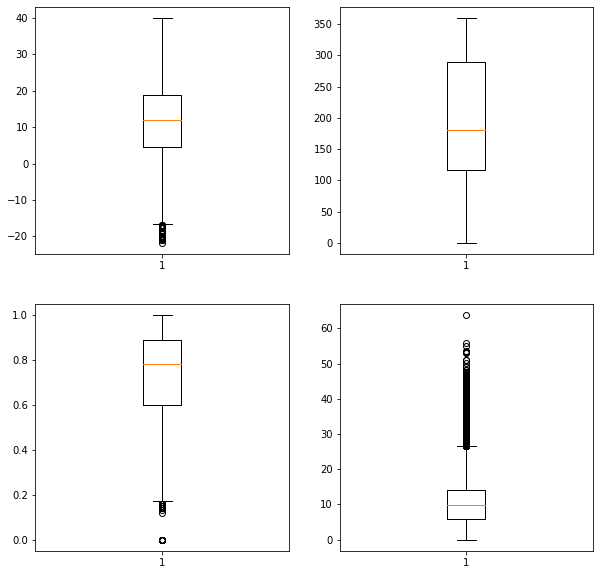

In [44]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.boxplot(data["Temperature (C)"])
plt.subplot(2,2,2)
plt.boxplot(data["Wind Bearing (degrees)"])
plt.subplot(2,2,3)
plt.boxplot(data["Humidity"])
plt.subplot(2,2,4)
plt.boxplot(data["Wind Speed (km/h)"])
plt.show()

In [45]:
data.corr()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Summary,1.000000,-0.116821,0.145821,0.141956,-0.112823,0.003068,0.023057,0.135659,0.144449
Precip Type,-0.116821,1.000000,-0.563503,-0.566058,0.232622,-0.067771,-0.042142,-0.316483,0.009271
Temperature (C),0.145821,-0.563503,1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,-0.005253
Apparent Temperature (C),0.141956,-0.566058,0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,-0.000037
Humidity,-0.112823,0.232622,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,0.005375
Wind Speed (km/h),0.003068,-0.067771,0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,-0.049453
Wind Bearing (degrees),0.023057,-0.042142,0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,-0.011629
Visibility (km),0.135659,-0.316483,0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,0.061011
Pressure (millibars),0.144449,0.009271,-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,1.000000


<AxesSubplot:>

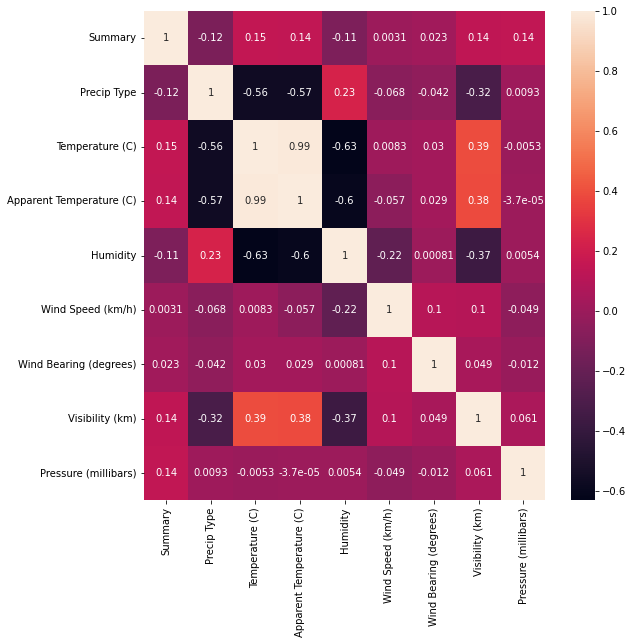

In [46]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(), annot=True)

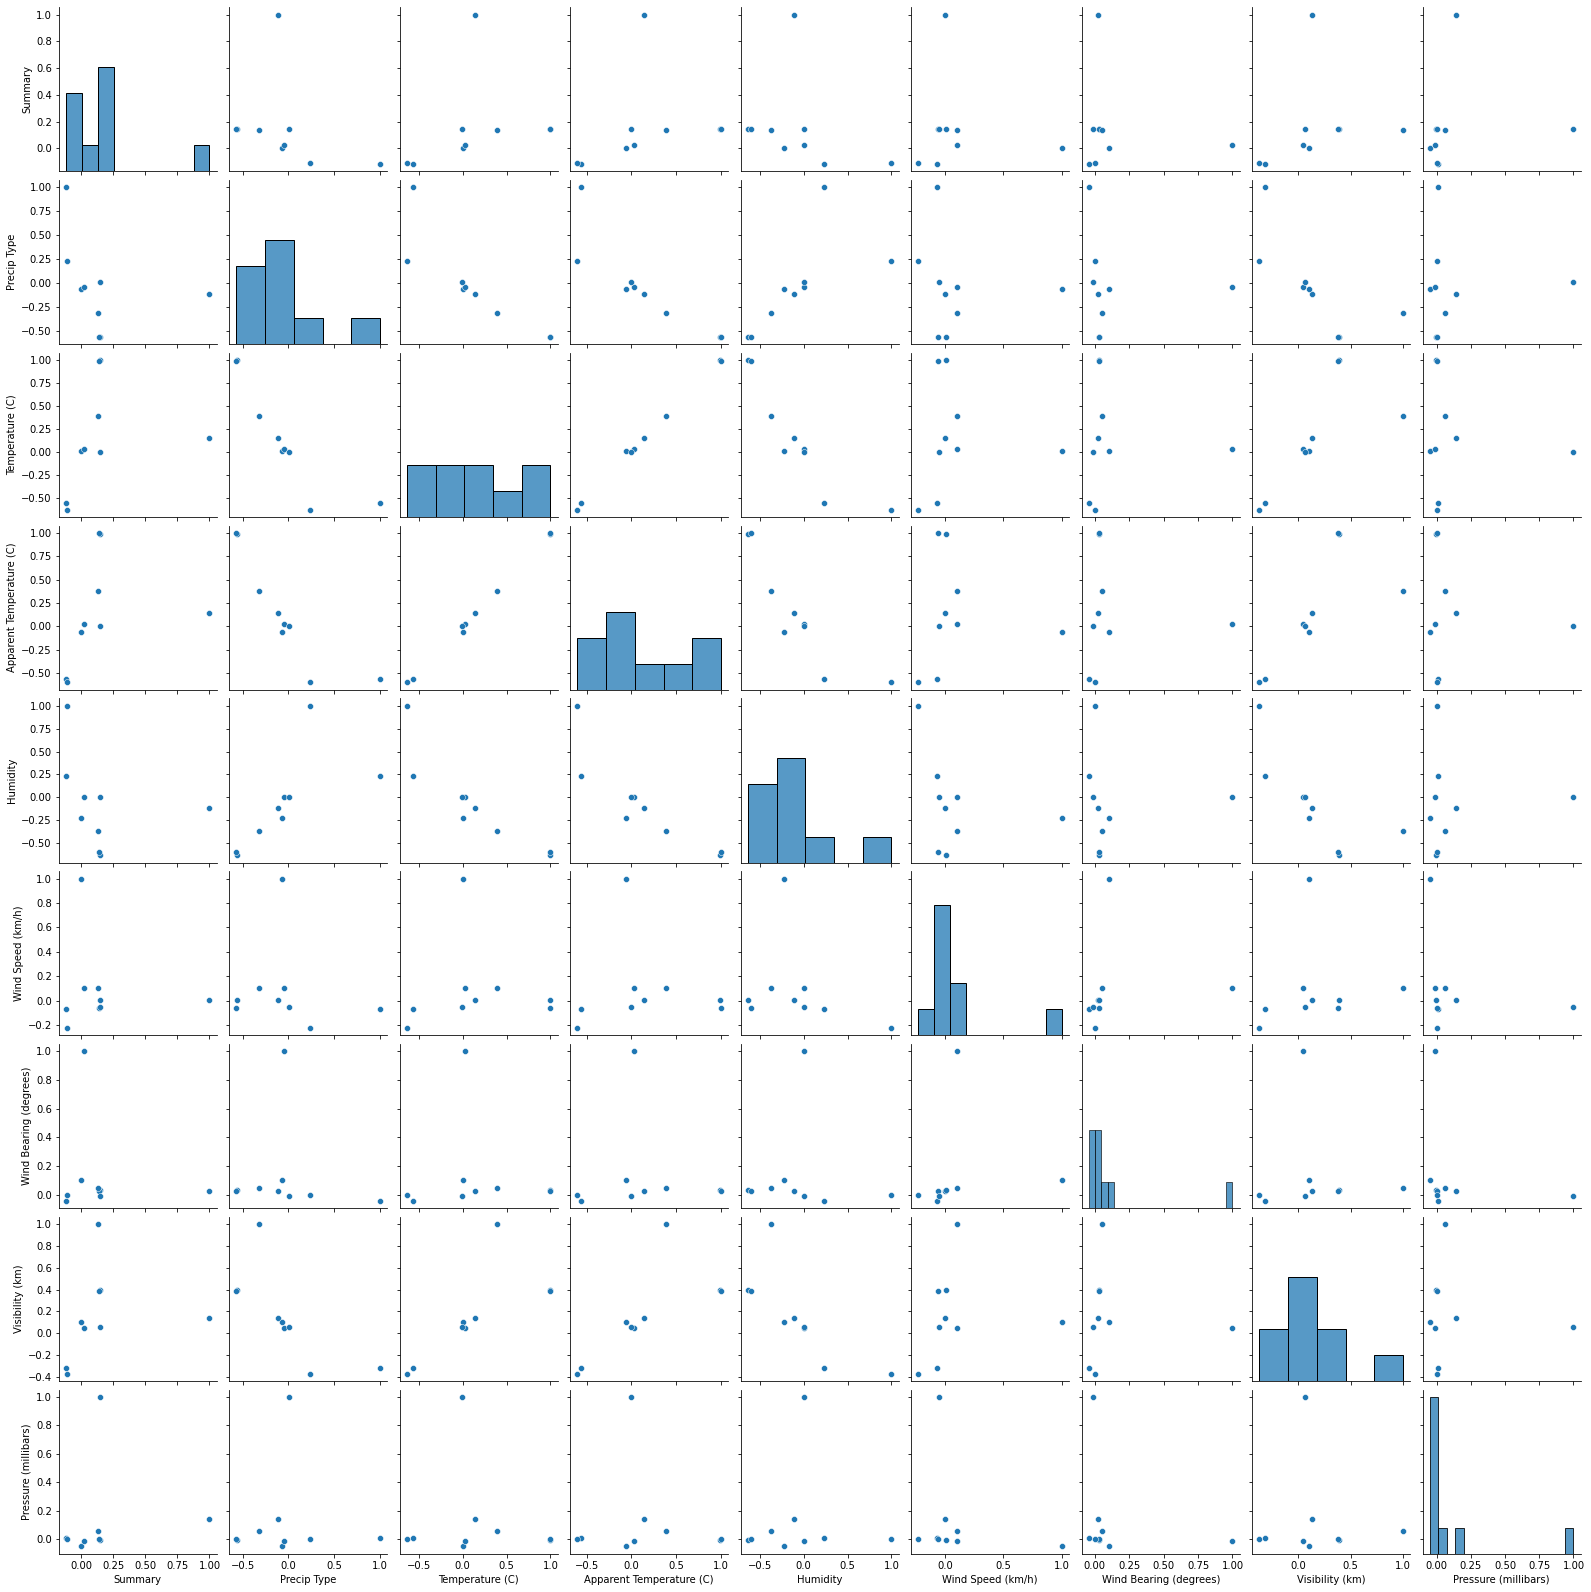

In [47]:
sns.pairplot(data.corr())

In [48]:
y = data.iloc[:,[1]].values
x = data.iloc[:, 1:]
x

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print('X Train: ',x_train.shape, '\nX Test: ', x_test.shape, '\nY Train: ', y_train.shape, '\nY Test', y_test.shape)

X Train:  (76748, 8) 
X Test:  (19188, 8) 
Y Train:  (76748, 1) 
Y Test (19188, 1)


In [50]:
# model_gini = tree.DecisionTreeClassifier(criterion = "gini", random_state = 0, max_depth=10, min_samples_leaf=5)
model_gini = tree.DecisionTreeClassifier()  
model_gini.fit(x_train, y_train)
y_pred = model_gini.predict(x_test)

In [51]:
model_entropy = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth=10, min_samples_leaf=5)
model_entropy.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=0)

In [52]:
print('Accuracy Score: ', accuracy_score(y_pred, y_test))

Accuracy Score:  1.0


In [53]:
print('Confusion Matrics: ', confusion_matrix(y_pred, y_test))


Confusion Matrics:  [[17026     0]
 [    0  2162]]


In [54]:
print('Classification Report: ', classification_report(y_pred, y_test))

Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     17026
           1       1.00      1.00      1.00      2162

    accuracy                           1.00     19188
   macro avg       1.00      1.00      1.00     19188
weighted avg       1.00      1.00      1.00     19188



In [55]:
y_pred = model_gini.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
pd.DataFrame({'Actual: ': y_test.reshape(19188,),'Predicted':y_pred})

,Actual:,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
19183,0,0
19184,0,0
19185,0,0
19186,0,0


In [57]:
x_test.columns

Index(['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')